In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk

In [80]:
sms = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin')

In [81]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
sms.columns[2]

'Unnamed: 2'

In [83]:
# Most of the 2,3,4 columns have null values
print(sms.iloc[:,2].isna().sum(),
      sms.iloc[:,3].isna().sum(),
      sms.iloc[:,4].isna().sum())

5522 5560 5566


In [84]:
sms = sms.drop([sms.columns[2],sms.columns[3],sms.columns[4]],axis=1)

Now we only have 2 columns in sms

In [85]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
sms.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

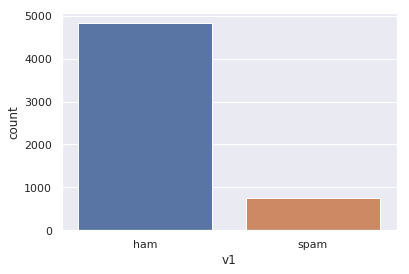

In [87]:
sns.countplot(sms["v1"])

In [88]:
sms.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [89]:
sms.groupby('v1').describe().T

v1                            ham  \
v2 count                     4825   
   unique                    4516   
   top     Sorry, I'll call later   
   freq                        30   

v1                                                      spam  
v2 count                                                 747  
   unique                                                653  
   top     Please call our customer service representativ...  
   freq                                                    4

In [90]:
sms['length'] = sms['v2'].apply(len)

In [91]:
sms.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [92]:
sns.set()

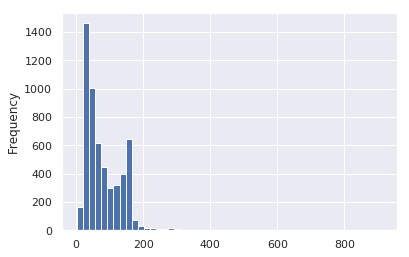

In [93]:
sms['length'].plot(bins=50,kind="hist")

In [94]:
sms.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75e9899a90>,
      dtype=object)

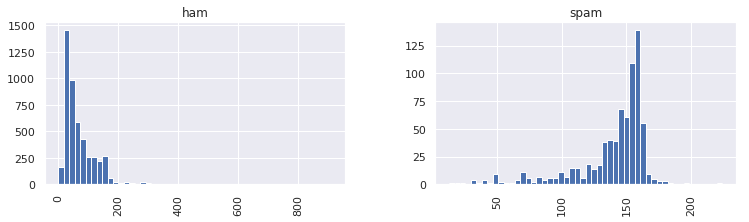

In [95]:
sms.hist(column='length',by='v1',bins=50,figsize=(12,3))

In [96]:
# The spam messages are longer

Pre Processing

In [97]:
import string

test = "We can turn, the world to go !"

puncless = [c for c in test if c not in string.punctuation]

puncless = "".join(puncless)

In [98]:
puncless

'We can turn the world to go '

In [99]:
from nltk.corpus import stopwords
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [100]:
list(puncless.split())

['We', 'can', 'turn', 'the', 'world', 'to', 'go']

In [101]:
stopless = [w for w in list(puncless.split()) if w not in stopwords.words('english')]

In [102]:
stopless

['We', 'turn', 'world', 'go']

Now we process all the entries

In [103]:
from nltk.corpus import stopwords
def text_process(msg):
    puncless = [c for c in msg if c not in string.punctuation]
    
    puncless = "".join(puncless)
    
    return [w for w in list(puncless.split()) if w.lower() not in stopwords.words('english')]

In [104]:
sms['v2'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: v2, dtype: object

In [105]:
#Vectorization

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(sms['v2'])

In [108]:
print(len(bow_transformer.vocabulary_))

11304


In [109]:
sms_bow = bow_transformer.transform(sms['v2'])
print("Sparse shape",sms_bow.shape)
print("Non zero",sms_bow.nnz)

Sparse shape (5572, 11304)
Non zero 50193


In [110]:
sparsity = (100.0 * sms_bow.nnz / (sms_bow.shape[0] * sms_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity,4)))

sparsity: 0.0797


In [111]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(sms_bow)
sms_tfidf = tfidf_transformer.transform(sms_bow)

In [112]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(sms_tfidf,sms['v1'])

In [114]:
#Testing
print("Predicted:",model.predict(sms_tfidf)[0])
print("expected:",sms.v1[3])

Predicted: ham
expected: ham


In [115]:
pred = model.predict(sms_tfidf)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(sms['v1'],pred))

SyntaxError: invalid syntax (<ipython-input-116-aa9c0fa4ba2e>, line 1)